## Logistic regression analysis | Breast cancer

Objective: classify a tumour as malignant or benign

## Import the relevant libraries

In [139]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Algorithms to use
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

from scipy import stats
#Apply a fix to the statsmodels library
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20

import warnings
warnings.filterwarnings("ignore")

## Load the data

In [142]:
data = pd.read_csv('breast_cancer.csv')
data.sample(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
138,2,1,1,1,2,1,1,1,1,2
157,3,1,1,1,2,1,3,1,1,2
346,6,10,10,10,10,10,8,10,10,4
678,3,1,1,1,3,2,1,1,1,2
559,10,9,7,3,4,2,7,7,1,4


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [144]:
selected_dataframe = data
columns_with_nan = ""; 
print(f'{[x for x in globals() if globals()[x] is selected_dataframe][0]} analysis: \n shape: {selected_dataframe.shape}, rows: {selected_dataframe.shape[0]}, columns: {selected_dataframe.shape[1]}\n columns names are: {", ".join(selected_dataframe.columns.values.tolist())}\n NaN values: {selected_dataframe.isna().values.any()} {"".join([columns_with_nan + _ + ", " for _ in selected_dataframe.columns.values if selected_dataframe[_].isna().values.any() == True])}\n duplicates: {selected_dataframe.duplicated().any()}')


data analysis: 
 shape: (683, 10), rows: 683, columns: 10
 columns names are: Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, Mitoses, Class
 NaN values: False 
 duplicates: True


In [141]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.00,683.00,683.00,683.00,683.00,683.00,683.00,683.00,683.00,683.00
mean,4.44,3.15,3.22,2.83,3.23,3.54,3.45,2.87,1.60,2.70
std,2.82,3.07,2.99,2.86,2.22,3.64,2.45,3.05,1.73,0.95
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
25%,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,4.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,2.00
75%,6.00,5.00,5.00,4.00,4.00,6.00,5.00,4.00,1.00,4.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00


## Preprocessing

In [145]:
# drop duplicates
data.drop_duplicates(inplace=True)

In [146]:
# decoding Class to 0/1 values corresponding benign/malignant
data['Class'] = data['Class'].map({2: 0, 4: 1})

In [148]:
# changing column names
data.columns = [x.lower() for x in data.columns]
data.columns = [x.replace(' ','_') for x in data.columns]
data[:5]

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


## Univariate Analysis

clump_thickness
Skew: 0.21  Mean: 5.38


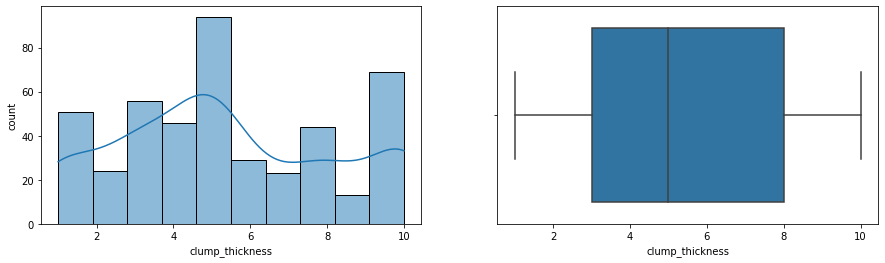

uniformity_of_cell_size
Skew: 0.64  Mean: 4.22


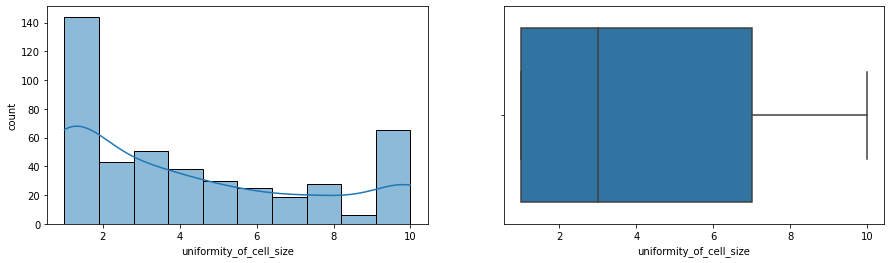

uniformity_of_cell_shape
Skew: 0.59  Mean: 4.27


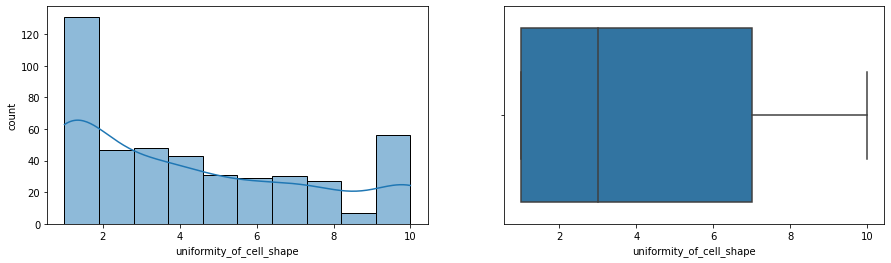

marginal_adhesion
Skew: 0.92  Mean: 3.75


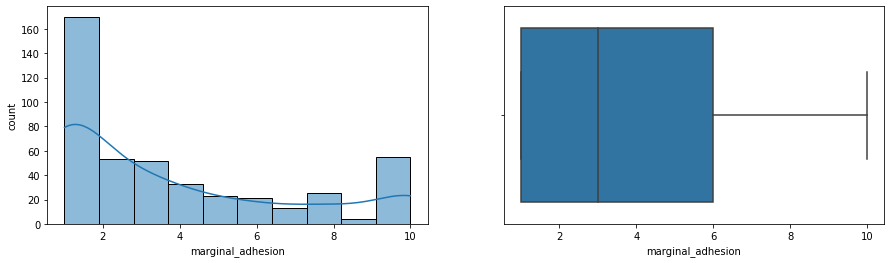

single_epithelial_cell_size
Skew: 1.14  Mean: 3.88


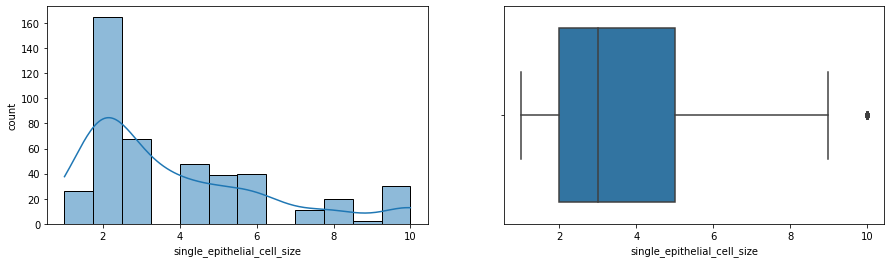

bare_nuclei
Skew: 0.36  Mean: 4.81


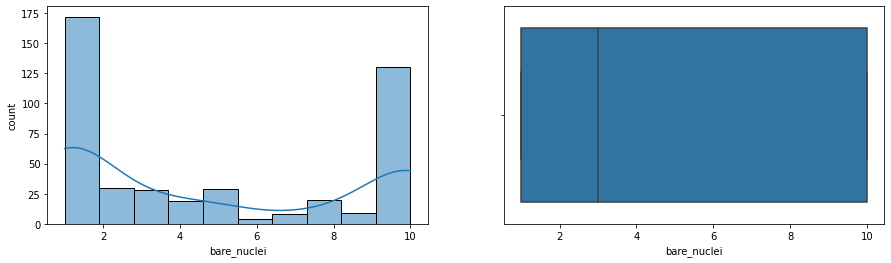

bland_chromatin
Skew: 0.59  Mean: 4.2


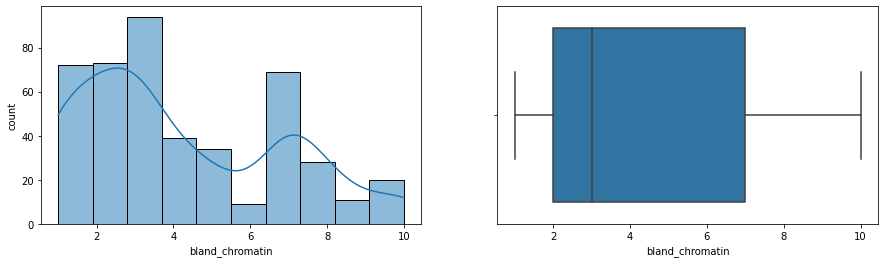

normal_nucleoli
Skew: 0.8  Mean: 3.83


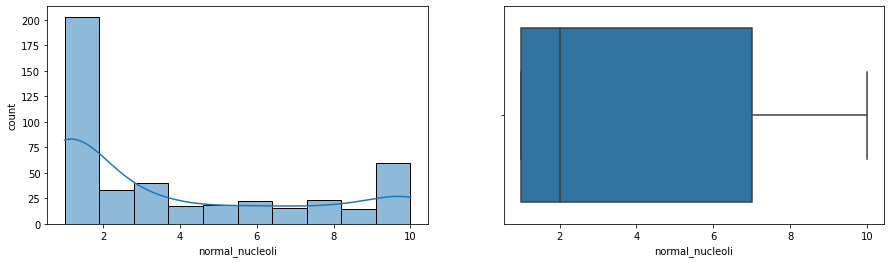

mitoses
Skew: 2.7  Mean: 1.91


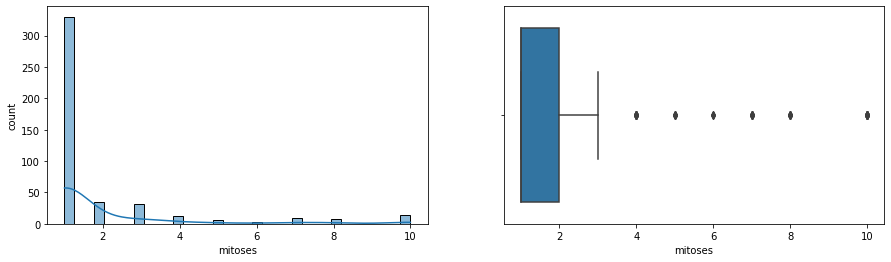

class
Skew: -0.1  Mean: 0.53


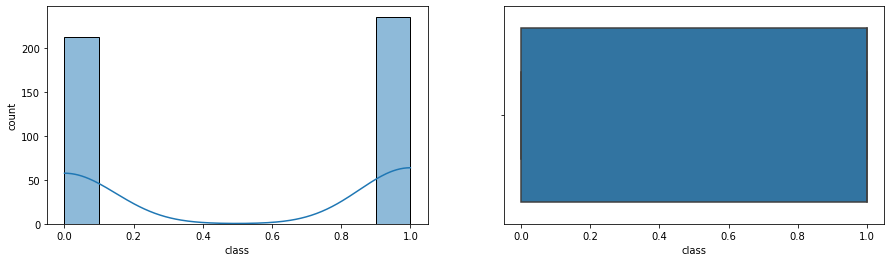

In [149]:
for col in data.columns:
    print(col)
    print('Skew:', round(data[col].skew(), 2), ' Mean:', round(data[col].mean(), 2))
    
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    sns.histplot(data=data, x=col, kde = True)
    plt.ylabel('count')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

## Bivariate Analysis

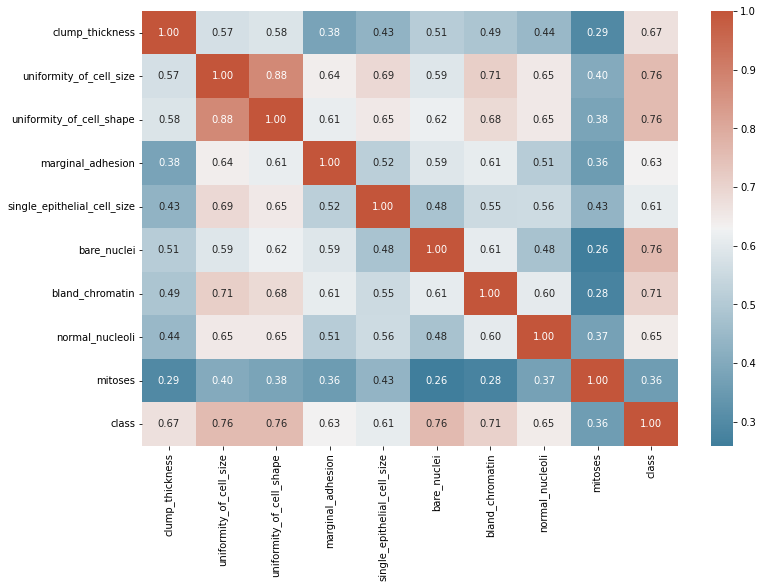

In [121]:
plt.figure(figsize = (12,8))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap=cmap)
plt.show()

In [122]:
sns.pairplot(data, kind="kde")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [123]:
# visualize the relationship between selected variables
box = px.box(data,
             y='uniformity_of_cell_size',
             x='class',
             color='class',
             notched=True,
             points='all',
             title='Relationship between uniformity of cell size and class')
box.update_layout(
    width=500,
    height=400,)
box.show()

In [124]:
box = px.box(data,
             y='uniformity_of_cell_shape',
             x='class',
             color='class',
             notched=True,
             points='all',
             title='Relationship between uniformity of cell shape and class')
box.update_layout(
    width=500,
    height=400,)
box.show()

In [125]:
box = px.box(data,
             y='bare_nuclei',
             x='class',
             color='class',
             notched=True,
             points='all',
             title='Relationship between bare nuclei and class')
box.update_layout(
    width=500,
    height=400,)
box.show()

In [126]:
box = px.box(data,
             y='bland_chromatin',
             x='class',
             color='class',
             notched=True,
             points='all',
             title='Relationship between bland chromatin and class')
box.update_layout(
    width=500,
    height=400,)
box.show()

In [127]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data.drop(['class'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,5.68,clump_thickness
1,14.24,uniformity_of_cell_size
2,14.16,uniformity_of_cell_shape
3,4.98,marginal_adhesion
4,6.75,single_epithelial_cell_size
5,5.17,bare_nuclei
6,8.26,bland_chromatin
7,4.58,normal_nucleoli
8,2.44,mitoses


In [128]:
# drop variable - since uniformity_of_cell_size has the highest VIF, I will remove it from the model
variables = variables.drop(['uniformity_of_cell_size'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,5.67,clump_thickness
1,8.64,uniformity_of_cell_shape
2,4.88,marginal_adhesion
3,6.50,single_epithelial_cell_size
4,5.16,bare_nuclei
5,8.05,bland_chromatin
6,4.55,normal_nucleoli
7,2.44,mitoses


All VIF values < 10

## Create the dependent and independent variables

In [129]:
y = data['class']
x1 = variables

## Regression

In [130]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.111311
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  449
Model:                          Logit   Df Residuals:                      440
Method:                           MLE   Df Model:                            8
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.8391
Time:                        11:32:26   Log-Likelihood:                -49.979
converged:                       True   LL-Null:                       -310.63
Covariance Type:            nonrobust   LLR p-value:                1.880e-107
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -9.4139      1.182     -7.963      0.000     -11.731      -7.097
clump_thickness                 0.5141      0.139      3.686      0.000       0.241       0.787
uniformity_of_cell_shape        0.2907      0.168      1.734      0.083      -0.038       0.619
marginal_adhesion               0.3071      0.119      2.581      0.010       0.074       0.540
single_epithelial_cell_size     0.0906      0.151      0.600      0.548      -0.205       0.387
bare_nuclei                     0.3577      0.092      3.892      0.000       0.178       0.538
bland_chromatin                 0.4114      0.165      2.501      0.012       0.089       0.734
normal_nucleoli                 0.2029      0.109      1.859      0.063      -0.011       0.417
mitoses                         0.4920      0.305      1.612      0.107      -0.106       1.090
===============================================================================================
"""

In [131]:
# drop single_epithelial_cell_size that has highers P value
y = data['class']
x1 = variables.drop(['single_epithelial_cell_size'],axis=1)
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.111710
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  449
Model:                          Logit   Df Residuals:                      441
Method:                           MLE   Df Model:                            7
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.8385
Time:                        11:32:26   Log-Likelihood:                -50.158
converged:                       True   LL-Null:                       -310.63
Covariance Type:            nonrobust   LLR p-value:                2.504e-108
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.2986      1.151     -8.079      0.000     -11.554      -7.043
clump_thickness              0.5131      0.139      3.695      0.000       0.241       0.785
uniformity_of_cell_shape     0.3149      0.165      1.903      0.057      -0.010       0.639
marginal_adhesion            0.3184      0.117      2.717      0.007       0.089       0.548
bare_nuclei                  0.3627      0.092      3.964      0.000       0.183       0.542
bland_chromatin              0.4260      0.163      2.614      0.009       0.107       0.745
normal_nucleoli              0.2158      0.108      1.995      0.046       0.004       0.428
mitoses                      0.4895      0.302      1.623      0.105      -0.102       1.081
============================================================================================
"""

In [132]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log.predict()

array([0.02, 0.87, 0.01, 0.79, 0.03, 1.00, 0.07, 0.01, 0.01, 0.01, 0.00,
       0.00, 0.33, 0.01, 1.00, 0.66, 0.01, 0.01, 1.00, 0.04, 1.00, 1.00,
       0.01, 0.00, 0.75, 0.01, 0.02, 0.00, 0.01, 0.01, 1.00, 0.01, 0.01,
       1.00, 0.18, 0.99, 0.67, 0.94, 1.00, 0.29, 1.00, 0.00, 0.95, 0.00,
       0.98, 0.94, 0.39, 0.99, 1.00, 1.00, 0.97, 0.98, 0.85, 0.73, 0.75,
       0.87, 0.00, 0.98, 0.45, 0.99, 0.93, 1.00, 0.00, 0.03, 1.00, 0.05,
       1.00, 0.88, 0.01, 0.01, 0.02, 0.02, 0.00, 0.04, 0.01, 0.02, 0.06,
       1.00, 1.00, 0.80, 1.00, 0.00, 0.00, 0.00, 1.00, 1.00, 0.98, 0.18,
       0.02, 0.70, 1.00, 0.95, 1.00, 0.99, 0.00, 1.00, 0.03, 0.91, 1.00,
       1.00, 0.02, 0.01, 0.27, 1.00, 0.00, 0.01, 0.01, 0.02, 1.00, 0.89,
       1.00, 1.00, 0.01, 0.98, 0.00, 1.00, 0.01, 0.01, 0.05, 0.00, 0.01,
       0.00, 0.98, 0.44, 0.00, 0.14, 1.00, 0.98, 1.00, 0.01, 0.00, 0.91,
       0.00, 1.00, 1.00, 0.02, 0.06, 0.02, 1.00, 1.00, 0.00, 1.00, 0.99,
       1.00, 0.97, 0.69, 1.00, 0.99, 0.01, 0.98, 1.

In [133]:
np.array(y)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [134]:
# Confusion matrix of the model and estimate its accuracy
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,203.00,10.00
Actual 1,11.00,225.00


In [135]:
def confusion_matrix(data,actual_values,model):
        pred_values = model.predict(data)
        bins=np.array([0,0.5,1])
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, accuracy
confusion_matrix(x,y,results_log)

(array([[203.00, 10.00],
        [11.00, 225.00]]), 0.9532293986636972)

In [136]:
print('Missclassification rate '+str(round((10+11)/(203+225),4)*100)+ '%')

Missclassification rate 4.91%


In [160]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression()
lr_model.fit(x,y)
lr_model.score(x,y)

prediction=lr_model.predict(x)

array([[203,  10],
       [ 11, 225]])

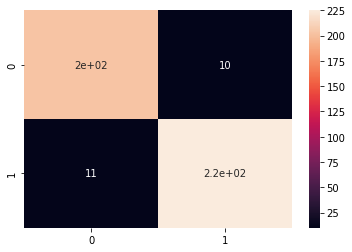

In [161]:
cm=confusion_matrix(y,prediction)
sns.heatmap(cm,annot=True)
cm


In [162]:
from sklearn.metrics import classification_report
clr=classification_report(y,prediction)
print(clr)


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       213
           1       0.96      0.95      0.96       236

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [152]:
pd.Series(lr_model.coef_[0], index=x.columns).sort_values(ascending=False)

clump_thickness            0.50
mitoses                    0.45
bland_chromatin            0.42
bare_nuclei                0.36
uniformity_of_cell_shape   0.32
marginal_adhesion          0.31
normal_nucleoli            0.22
const                      0.00
dtype: float64

In [153]:
odds = np.exp(lr_model.coef_[0]) #finding the odds
#adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, x.columns, columns=['odds']).sort_values(by='odds', ascending=False)



,odds
clump_thickness,1.66
mitoses,1.57
bland_chromatin,1.51
bare_nuclei,1.43
uniformity_of_cell_shape,1.37
marginal_adhesion,1.37
normal_nucleoli,1.24
const,1.00


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       213
           1       0.96      0.95      0.96       236

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



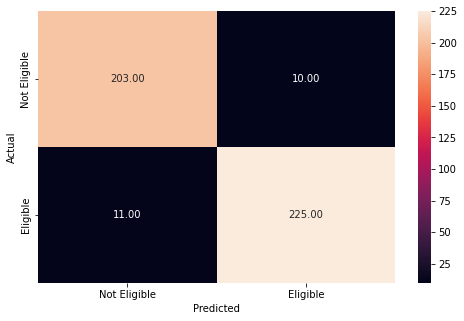

In [164]:
#function to print classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#predict on the training data 
y_pred_train = lr_model.predict(x) 

# Checking performance on the training data
metrics_score(y, y_pred_train)


In [166]:
## Single prediction
val=np.array([1.00,5,1,1,1,3,1,1])
val=val.reshape(1,-1)
single_pre=lr_model.predict(val)
print(single_pre)


[0]
